In [35]:
%run functions.ipynb
%matplotlib inline

import plothist as ph
import numpy as np
import pandas as pd
#import scipy as sci
#import sympy as sym
#import statistics as stat
import random as rng
#import itertools as ite
#import time
import math
#------------------
import matplotlib.pyplot as plt
#import matplotlib.animation as manim
import matplotlib_inline
#from matplotlib.ticker import AutoMinorLocator
#import cartopy.crs as ccr
#from cartopy.io.img_tiles import GoogleTiles
#import timeit
#import Ipython.display
#from IPython.display import display
from mpl_toolkits import mplot3d
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from matplotlib.ticker import AutoMinorLocator, MaxNLocator

#---------
#import json
import os
#import gc
#import sys
#----------
#import awkward as ak
#import uproot
#import vector
pd.options.display.max_columns = None
df_chg = pd.read_pickle('DlKKs_chgMC_df.p')
df_mix = pd.read_pickle('DlKKs_mixMC_df.p')
df_cc = pd.read_pickle('DlKKs_ccMC_df.p')
df_uds = pd.read_pickle('DlKKs_udsMC_df.p')
df_off = pd.read_pickle('DlKKs_off_df.p')
df_dat = pd.read_pickle('DlKKs_data_df.p')



df_cc2 = pd.read_pickle('for_Thomas/DlKKs_ccMC_df.p')
df_chg2 = pd.read_pickle('for_Thomas/DlKKs_chgMC_df.p')
df_mix2 = pd.read_pickle('for_Thomas/DlKKs_mixMC_df.p')
df_dat2 = pd.read_pickle('for_Thomas/DlKKs_data_df.p')

datasmc = [df_chg,df_mix,df_cc,df_uds]
df_names = [r"$B^+B^-$", r"$B^0\bar{B}^0$", r"$c\bar{c}$", r"light $q\bar{q}$ ($u,d,s$)", r"off-resonance"]
datasmc_old = [df_chg2,df_mix2,df_cc2]


'''
The last one is from e+e-  qqbar, where q is u, d, or s.

 

The normalization factors are:

 

Data lumi = 365.290, BB cross-section = 1050000.0, Offpeak lumi = 42.740

Generic MC lumi = 1461.16, wtMC = 0.250, wtMCOff = 0.029

Note that the chgMC luminosity is a bit lower: one grid job kept failing, so we only ran over 325/326 files successfully.
3.99 more data 
'''



'''
The last one is from e+e-  qqbar, where q is u, d, or s.

 

The normalization factors are:

 

Data lumi = 365.290, BB cross-section = 1050000.0, Offpeak lumi = 42.740

Generic MC lumi = 1461.16, wtMC = 0.250, wtMCOff = 0.029

Note that the chgMC luminosity is a bit lower: one grid job kept failing, so we only ran over 325/326 files successfully.
3.99 more data 
'''


'\nThe last one is from e+e- \uf0e0 qqbar, where q is u, d, or s.\n\n\n\nThe normalization factors are:\n\n\n\nData lumi = 365.290, BB cross-section = 1050000.0, Offpeak lumi = 42.740\n\nGeneric MC lumi = 1461.16, wtMC = 0.250, wtMCOff = 0.029\n\nNote that the chgMC luminosity is a bit lower: one grid job kept failing, so we only ran over 325/326 files successfully.\n3.99 more data \n'

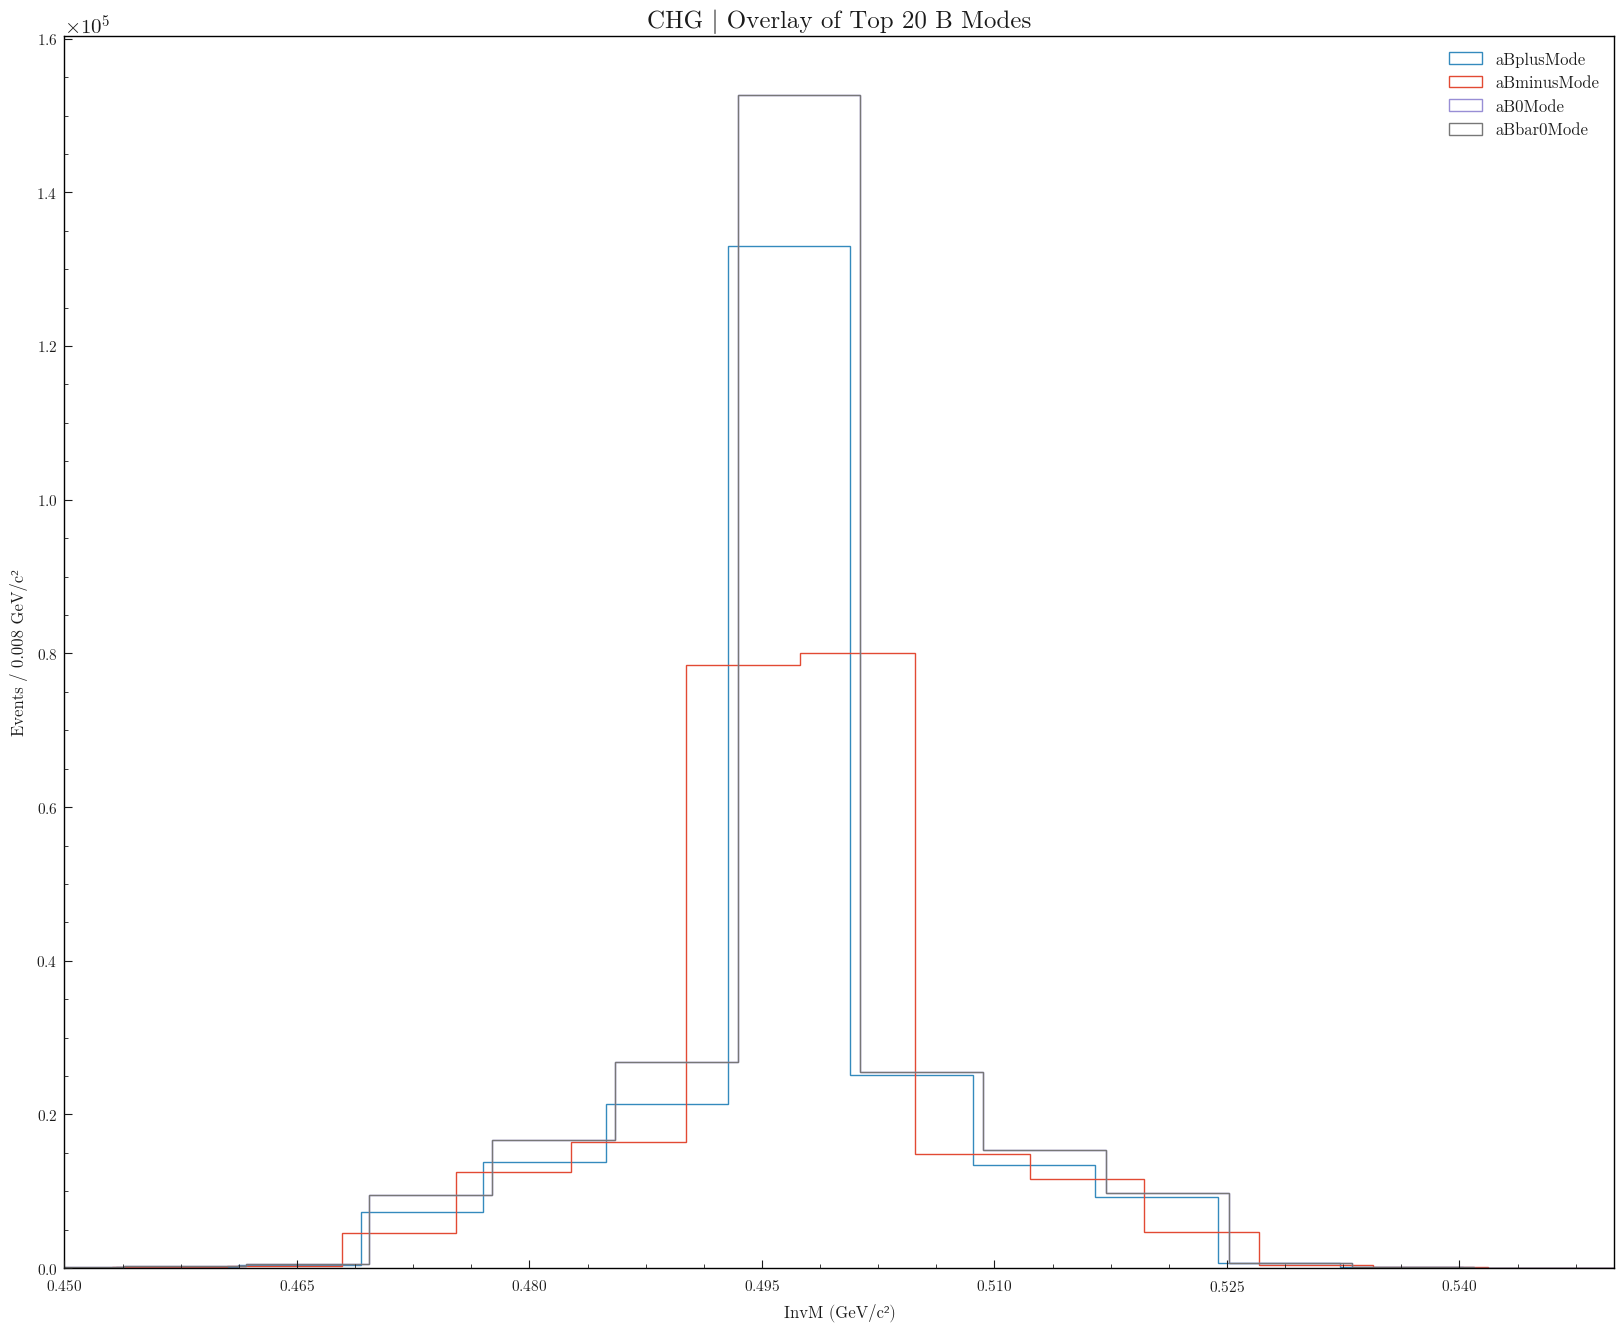

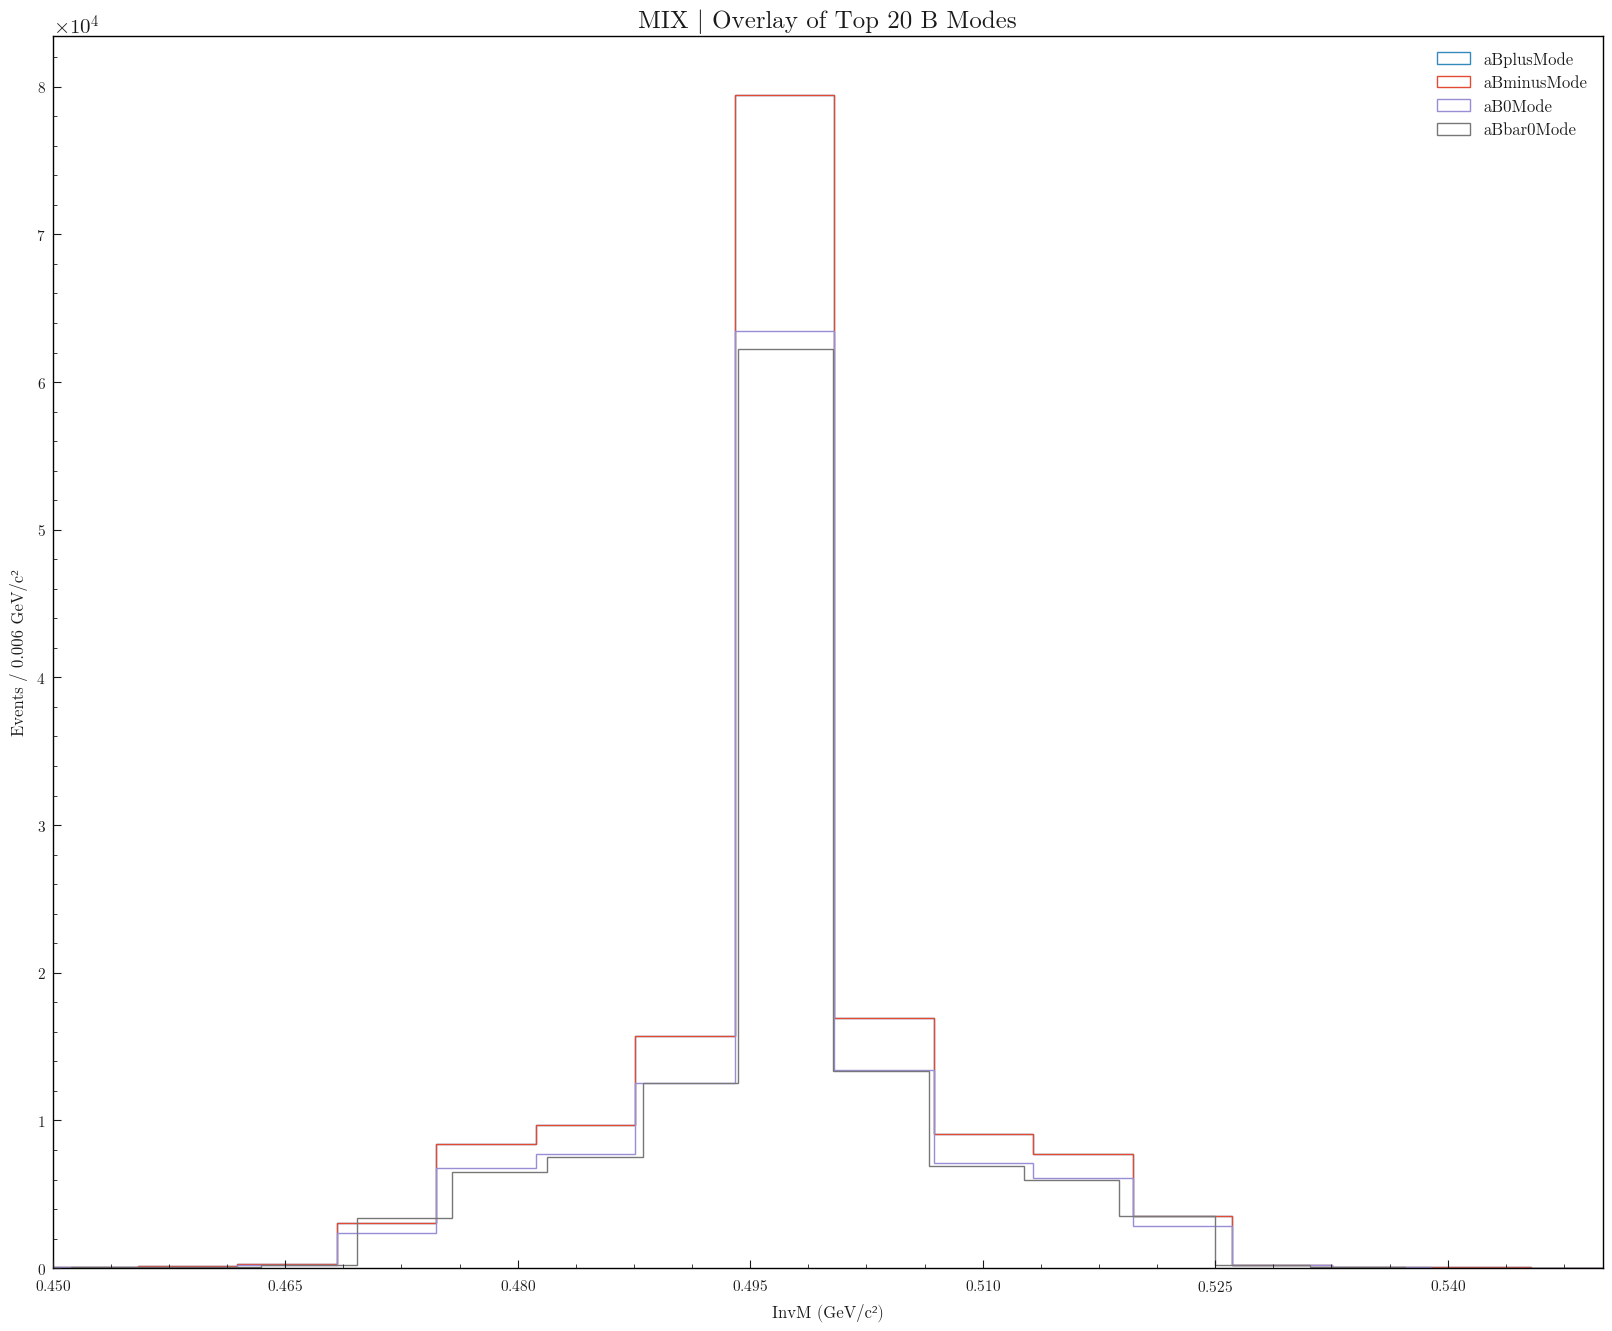

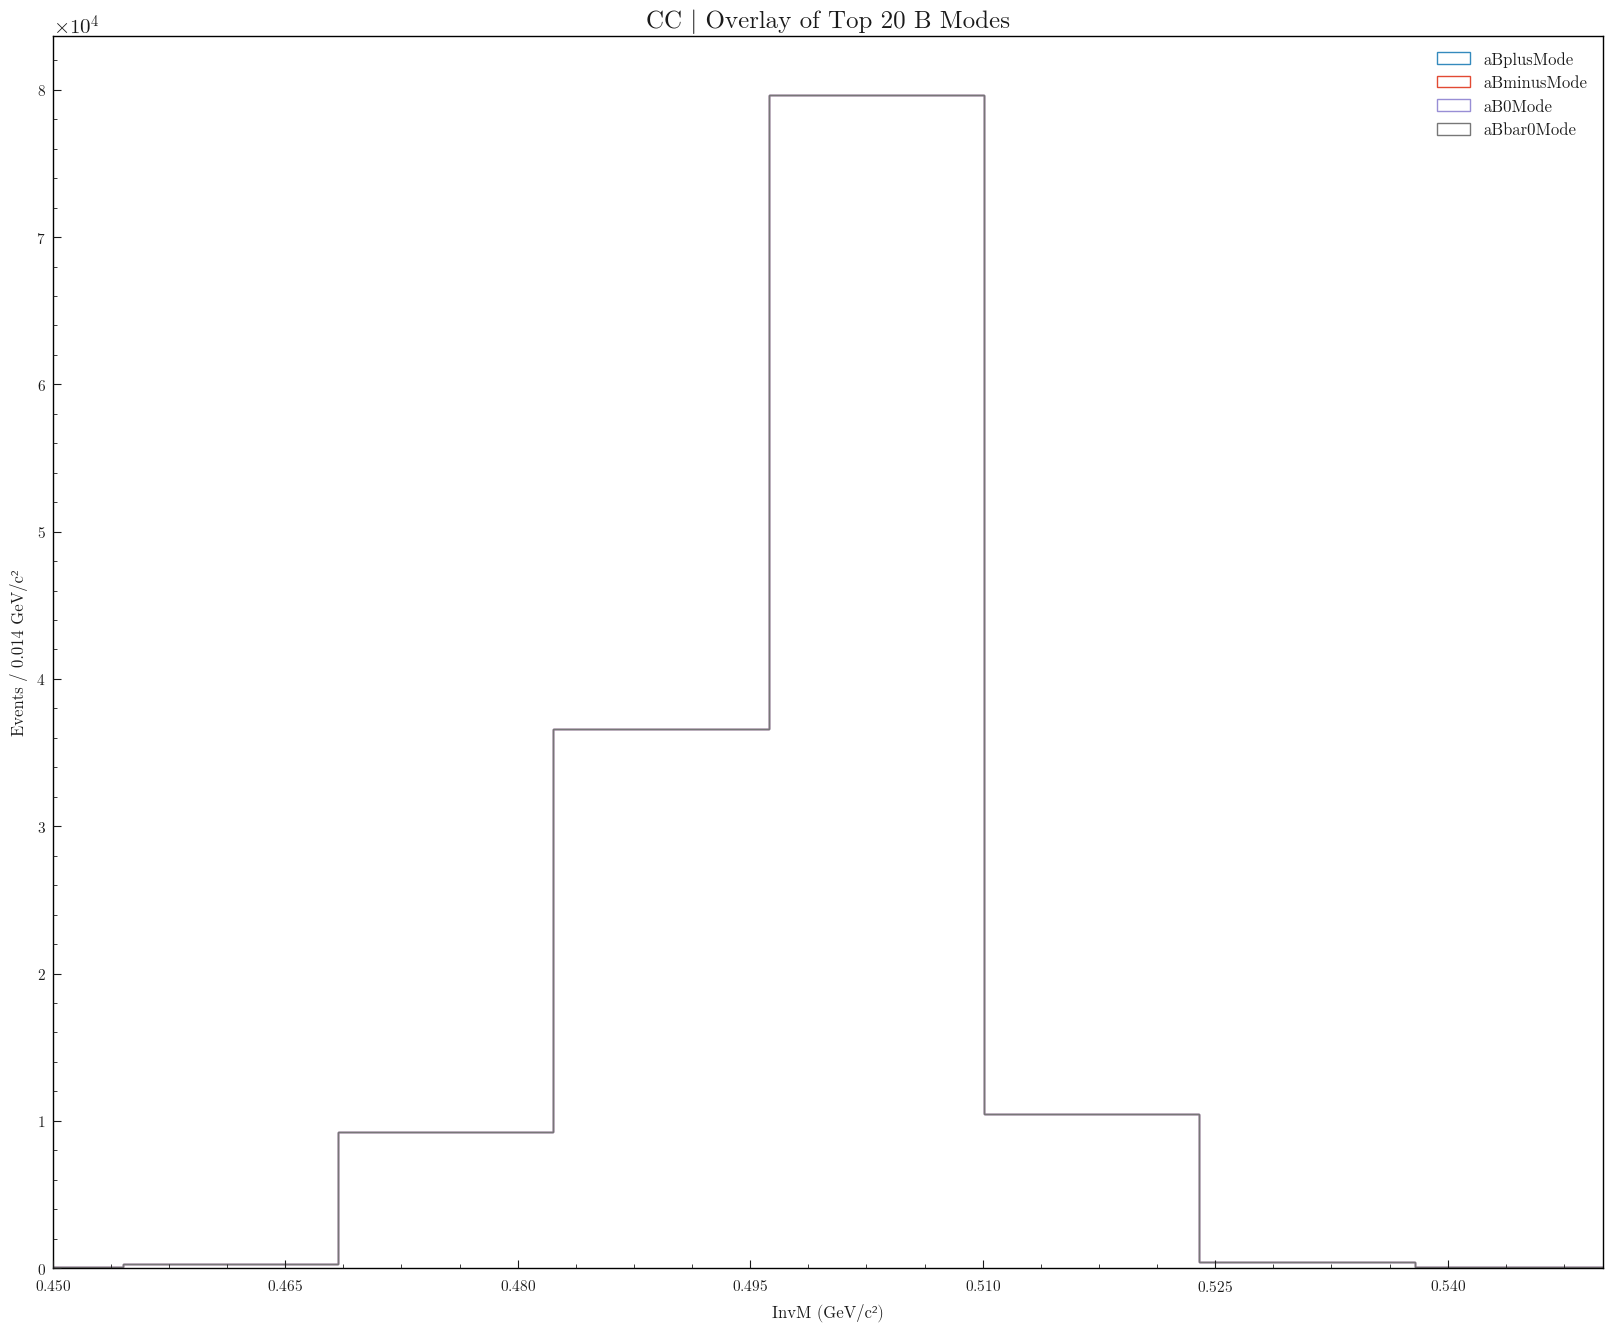

In [34]:
mode_cols = ['aBplusMode', 'aBminusMode', 'aB0Mode', 'aBbar0Mode', 'aD0Mode', 'aDbar0Mode', 'aDplusMode', 'aDminusMode']

top_count = 20

def add_belle2_lumi_label(ax, lumi=365.290, pos=(0.02, 0.95)):
    label = f'${lumi:.3f}\\ \\mathrm{{fb}}^{{-1}}$'
    ax.text(pos[0], pos[1], label, transform=ax.transAxes, fontsize=12,
            fontweight='bold', verticalalignment='top', color='black',
            bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
    
dfs = {'chg': df_chg, 'mix': df_mix, 'cc': df_cc}
all_top = {}; all_masks = {}; all_chains = {}
for key, df in dfs.items():
    tot = {}; msk = {}
    for col in mode_cols:
        val = df[col].value_counts().iloc[:top_count].index
        tot[col] = val
        msk[col] = df[col].isin(val)
    all_top[key] = tot
    all_masks[key] = msk
    channel = []
    for i in range(4):
        for j in range(4,8):
            b_col = mode_cols[i]
            d_col = mode_cols[j]
            for b_val in tot[b_col]:
                df_b = df[df[b_col] == b_val]
                top_d = df_b[d_col].value_counts().iloc[:10]
                channel.append(((b_col, b_val, d_col), top_d))
    all_chains[key] = channel

for key in ['chg', 'mix', 'cc']:
    df = dfs[key]
    msk = all_masks[key]
    fig, ax = plt.subplots(figsize=(20, 16))
    for i in range(4):
        col = mode_cols[i]
        mask = msk[col]
        hist = ph.make_hist(df.loc[mask, 'K0S_InvM'], bins=50)
        ph.plot_hist(hist, ax=ax, label=col, histtype='step')
        ax.set_title(f'K0S Invariant Mass Distribution', fontsize=14, fontweight='bold')
        ax.set_xlabel(f'InvM (GeV/c²)', fontsize=12)
        bin_edges = hist.axes[0].edges
        bin_width = bin_edges[1] - bin_edges[0]
        ax.set_ylabel(f'Events / {bin_width:.3f} GeV/c²', fontsize=12)
        ax.tick_params(axis='both', labelsize=11)
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())
        ax.xaxis.set_major_locator(MaxNLocator(nbins='auto'))
        ax.legend(fontsize=10, frameon=False)
        add_belle2_lumi_label(ax0, lumi=365.290)
        
    plt.xlim(0.45, 0.55)
    plt.title(f'{key.upper()} | Overlay of Top {top_count} B Modes')
    plt.legend()


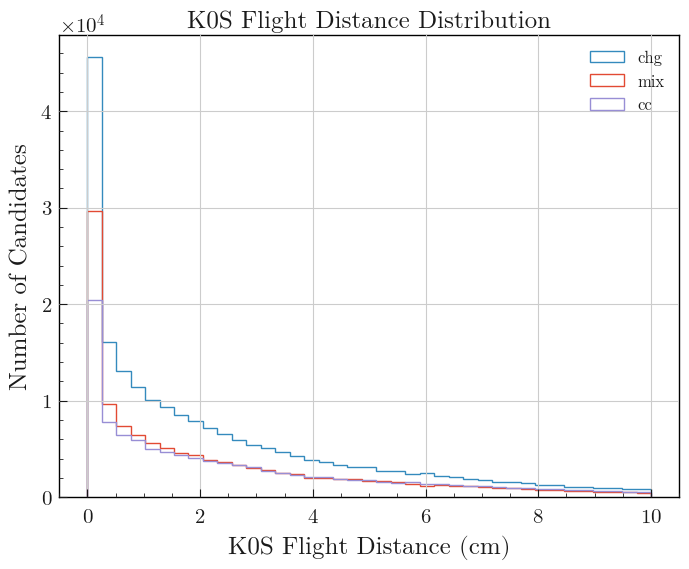

In [48]:
bins = np.linspace(0, 10, 40)
labels = ['chg','mix','cc',]
plt.figure(figsize=(8,6))
i = 0
for key, df in dfs.items():
    plt.hist(df['K0S_flightDistance'], bins=bins, histtype='step', label=labels[i])
    i += 1
plt.xlabel('K0S Flight Distance (cm)')
plt.ylabel('Number of Candidates')
plt.title('K0S Flight Distance Distribution')
plt.legend()
plt.grid(True)
plt.show()
#all_chains # D∗0_ + µ+ + νµ-> K− + π+ + π0 is 1021 to 1036 , K0S_flightDistanceErr